In [55]:
# homework_set_6.ipynb

## EE 351M Homework Set 6
# Eric Graves
# edg732
# Created 10/29/2019

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.io
import os

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

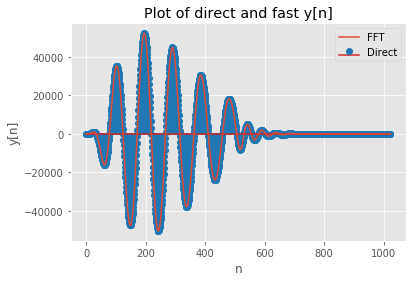

In [10]:
## Problem 4 a), b)
## Directly compute the convolution of x[n] and h[n] and plot the resulting ydir[n]. 
## In Python, you may want to use ’np.convolve(x,h)’; you will also need to import numpy, 
## scipy and matplotlib.pyplot.

# Given
L = 512 # number of samples
n = np.linspace(0,511,512) # 0 <= n <= 511

hn = (np.power(0.98, n))*np.sin(np.pi*n/24) # Impulse response
xn = n*n*(np.power(0.99, n))*np.cos(np.pi*n/48) # Input

# Convolve 
y_direct = np.convolve(xn, hn)

# FFT and Convolve
hk = np.fft.fft(hn, 2*L)
xk = np.fft.fft(xn, 2*L)

yk = hk*xk

y_fast = np.fft.ifft(yk).real

# Plot
with plt.style.context('ggplot'): # Set style to be like R
    
    # 4a) Plot direct convolution
    plt.figure()
    plt.title('Plot of direct and fast y[n]')
    p1 = plt.stem(y_direct, label = 'Direct')
    
    
    # 4b) Plot FFT
    p2 = plt.plot(y_fast, label = 'FFT')

    plt.ylabel('y[n]') 
    plt.xlabel('n') 
    plt.legend()
    
    
    
    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }
    

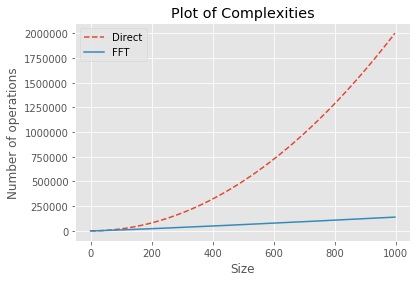

In [17]:
## Problem 4 c) Visualize complexities

s = np.linspace(1,1000,999) 

ndir = 2*s*s 
nfast = 12*s*np.log2(2*s) + 8*s + 4


# Plot
with plt.style.context('ggplot'): # Set style to be like R
    
    # 4c) Plot complexities
    plt.figure()
    plt.title('Plot of Complexities')
    
    plt.plot(ndir, '--', label = 'Direct')
    plt.plot(nfast, label = 'FFT')

    plt.ylabel('Number of operations') 
    plt.xlabel('Size') 
    plt.legend()
    
    
    
    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }
    